In [2]:
from cnnface.stimulus.Image_process import img_similarity,nor
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

In [ ]:
baseimg = np.array(Image.open(r'D:\cnnface\female_male_test_51_addnoise\Morph_face_gray/frame001.png'))
imgs_name = os.listdir(r'D:\cnnface\female_male_test_51_addnoise\Morph_face_gray')
imgs_path = [os.path.join(r'D:\cnnface\female_male_test_51_addnoise\Morph_face_gray',name) for name in imgs_name]
imgs = [np.array(Image.open(path)) for path in imgs_path]
similarity = [img_similarity(baseimg, img, 'SSIM') for img in imgs]

sns.set_style('darkgrid')
bins = np.arange(0,101,1)
sns.lineplot(x=bins,y=similarity)
plt.show()

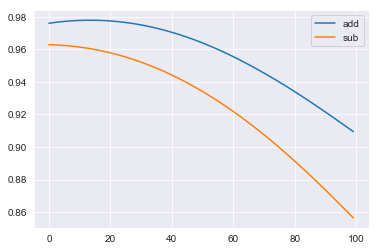

In [3]:
from cnnface.analysis.generate_ci import generateCI
sns.set_style('darkgrid')
female = np.array(Image.open(r'D:\cnnface\female_male_test_51_addnoise\Face_template\face_template/female_average_face_gray_512.jpg').convert('L'))
male = np.array(Image.open(r'D:\cnnface\female_male_test_51_addnoise\Face_template\face_template/male_average_face_gray_512.jpg').convert('L'))

bi = np.array(Image.open(r'D:\cnnface\female_male_test_51_addnoise\Face_template\face_template/frame054_gray_512.jpg')).astype('int64')
para_ci = np.load(r'D:\cnnface\female_male_test_51_addnoise\Face_template\meta_data/paras_ci.npy')
ci = generateCI(para_ci)
scales = np.arange(0,100,1)

bi_add = [bi+ci*scale for scale in scales]
bi_sub = [bi-ci*scale for scale in scales]

simis_add = []
simis_sub = []
for i,_ in enumerate(bi_add):
    b_add = bi_add[i]
    b_add[b_add>255] = 255
    b_add[b_add<0] = 0
    
    
    b_sub = bi_sub[i] 
    b_sub[b_sub>255] = 255
    b_sub[b_sub<0] = 0
    
    addimg = Image.fromarray(nor(b_add)*200).convert('L')
    subimg = Image.fromarray(nor(b_sub)*200).convert('L')
    
    addimg.save(r'D:\cnnface\female_male_test_51_addnoise\Face_template\classification_noise\different_scale_ci/morescale//add/ci_add_%04d.jpg' %i)
    subimg.save(r'D:\cnnface\female_male_test_51_addnoise\Face_template\classification_noise\different_scale_ci/morescale/sub/ci_sub_%04d.jpg' %i)
    
    simi_add = img_similarity(female,b_add,'pearson')
    simi_sub = img_similarity(male, b_sub, 'pearson')
    
    simis_add.append(simi_add)
    simis_sub.append(simi_sub)
    
scales = np.tile(scales,(2,))
simis = simis_add + simis_sub
add  =  ['add'] * 100
sub =  ['sub'] * 100
hue = add + sub
sns.lineplot(scales,simis,hue=hue)

In [45]:
barfsas = np.array(simis_add)
print(np.argwhere(barfsas==barfsas.max()))




[[13]]


In [1]:
# 在anconda的python3.6里运行

from facemorpher import averager,list_imgpaths
import os

prepath = r'D:\cnnface\gender_analysis\train_stimulus\male'
imgs_path = os.listdir(prepath)
target_prepath = r'D:\cnnface\gender_analysis\face_template'

for img_path in imgs_path:
    target_path = os.path.join(target_prepath, img_path + '.png')
    img_path = os.path.join(prepath, img_path)
    averager(list_imgpaths(img_path), None, int(512), int(512), 'transparent', True, target_path)

OSError: The hardware look-up table (GetDeviceGammaRamp) was unable to be used. If you would like to proceed without look-up table (gamma) changes, you can set the `Window` parameter `gammaErrorPolicy` to `"warn"` or `"ignore"`.

In [38]:
# 批量移动文件
import os
import shutil

ori_path =r'D:\VGGface2\overlap_vggface2_male'
sub_list= os.listdir(ori_path)

i = 1
for sub in sub_list:
   sub_path = os.path.join(ori_path,sub)
   img_list = os.listdir(sub_path)
   for img in img_list:
       img_path = os.path.join(sub_path,img)
       i_str = str(i).zfill(6)
       tar_path = 'D:\VGGface2\overlap_male/{}.jpg'.format(i_str)
       i = i + 1 
       shutil.move(img_path,tar_path)

[0.    0.525 1.   ] [0.         0.48333333 1.        ] [2. 1. 0.] 0.4791666666666667


<Figure size 432x288 with 0 Axes>

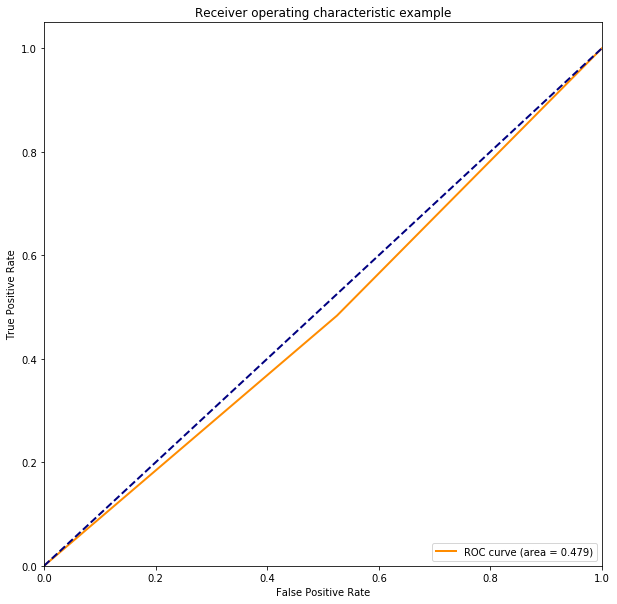

In [31]:
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
cla = [0,1]
y_true = np.random.choice(cla,(100,))
y_score = np.ones(100)
y_score[:50] = 0

fpr, tpr, threshold = roc_curve(y_true,y_score)
auc = auc(fpr,tpr)
print(fpr,tpr,threshold,auc)

plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.3f)' % auc) ###假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [42]:
import os
import shutil

path = r'D:\cnnface\gender_analysis\train_stimulus\train\male'

img_list = os.listdir(path)
num = 1 
for i,img in enumerate(img_list):
    if i % 50 == 0 and num <= 230:        
        src_path = os.path.join(path,img)
        des_path = os.path.join(r'D:\cnnface\gender_analysis\train_stimulus\test\male',img)
        shutil.move(src_path,des_path)
        num = num + 1 


0.47996794871794873


<Figure size 432x288 with 0 Axes>

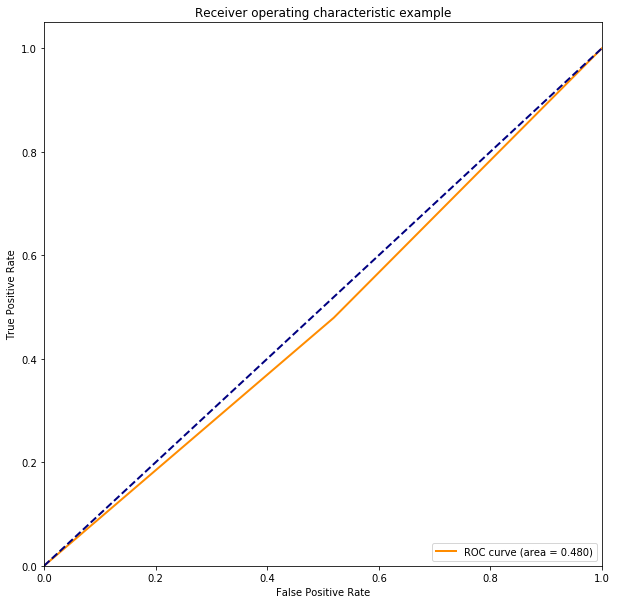

In [36]:
# 计算 roc 曲线
    
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

actual_label = np.random.choice((0,1),(100,))
y_score = np.ones(100)
y_score[:50] = 0

fpr, tpr, threshold = roc_curve(actual_label,y_score)
auc_value = auc(fpr,tpr)
print(auc_value)

plt.figure()
lw = 2
plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.3f)' % auc_value)  # 假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [37]:
hitrate1 = (actual_label[:50]==0).sum()/50
falsealarm1 = (actual_label[:50]==1).sum()/50

falsealarm2 = (actual_label[50:]==0).sum()/50
hitrate2 = (actual_label[50:]==1).sum()/50

hitrate = (hitrate1 + hitrate2)/2
falsealarm = (falsealarm1+falsealarm2)/2

print('hitrate:',hitrate,'\n','falsealarm:',falsealarm)


[0.         0.51923077 1.        ] [0.         0.47916667 1.        ]
hitrate: 0.48 
 falsealarm: 0.52
